In [1]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from keras import utils as np_utils
from keras import layers
from keras import utils
import tensorflow_addons as tfa
from keras.metrics import Precision
from keras.metrics import Recall
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.layers import Flatten
from keras.layers import Embedding
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import SpatialDropout1D
from keras.layers import LSTM
from sklearn.utils import shuffle
import xgboost as xgb

In [2]:
Phis = pd.read_csv("Phishing_Legitimate/Phishing_Legitimate_full.csv")

In [3]:
Phis

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,3,1,1,50,0,0,0,0,0,...,0,0,0,1,1,-1,1,0,1,0
9996,9997,2,1,4,59,1,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
9997,9998,2,1,4,57,0,0,0,0,0,...,0,0,0,1,0,1,1,0,1,0
9998,9999,3,1,1,49,0,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0


In [4]:
Phis['CLASS_LABEL'].value_counts()

1    5000
0    5000
Name: CLASS_LABEL, dtype: int64

In [4]:
Phis = Phis.drop('id', axis=1)

In [5]:
Phis

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,3,1,5,72,0,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,3,1,3,144,0,0,0,0,2,0,...,0,0,0,1,-1,1,1,1,1,1
2,3,1,2,58,0,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,3,1,6,79,1,0,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,3,0,4,46,0,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3,1,1,50,0,0,0,0,0,0,...,0,0,0,1,1,-1,1,0,1,0
9996,2,1,4,59,1,0,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
9997,2,1,4,57,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,1,0
9998,3,1,1,49,0,0,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0


In [6]:
Phis_data = Phis.drop(['CLASS_LABEL'], axis=1)

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [8]:
Phis_scaled = pd.DataFrame(scaler.fit_transform(Phis_data))

In [9]:
Phis_scaled

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,0.10,0.071429,0.277778,0.248963,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,1.0,1.0,0.5,1.0,1.0,0.0,1.0
1,0.10,0.071429,0.166667,0.547718,0.000000,0.0,0.0,0.0,0.111111,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
2,0.10,0.071429,0.111111,0.190871,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.5,0.0,1.0,0.0,0.5
3,0.10,0.071429,0.333333,0.278008,0.018182,0.0,0.0,0.0,0.000000,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
4,0.10,0.000000,0.222222,0.141079,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.10,0.071429,0.055556,0.157676,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.5,1.0
9996,0.05,0.071429,0.222222,0.195021,0.018182,0.0,0.0,0.0,0.000000,0.0,...,0.0,1.0,0.0,0.0,1.0,0.5,0.5,1.0,0.5,1.0
9997,0.05,0.071429,0.222222,0.186722,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.5,1.0,1.0,0.5,1.0
9998,0.10,0.071429,0.055556,0.153527,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.5,1.0,0.5,1.0


In [10]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif

# Chi_square feature selection

In [11]:
bestfeatures = SelectKBest(score_func=chi2, k=20)

In [12]:
fit_feat = bestfeatures.fit(Phis_scaled, Phis['CLASS_LABEL'])

In [13]:
Phis_scores = pd.DataFrame(fit_feat.scores_)
Phis_columns = pd.DataFrame(Phis_scaled.columns)

In [14]:
featureScores = pd.concat([Phis_columns, Phis_scores],axis=1)
featureScores.columns = ['Specs','Score']

In [15]:
print(featureScores.nlargest(20, 'Score'))

    Specs        Score
34     34  1689.107757
38     38  1114.288820
47     47   896.111749
33     33   842.444974
39     39   365.428740
26     26   327.617294
24     24   270.046051
32     32   198.340278
25     25   189.563923
16     16   172.000000
29     29   156.149763
4       4   133.693213
40     40   131.788820
31     31    99.335953
17     17    98.666667
43     43    94.692217
7       7    90.694656
18     18    79.791327
36     36    55.314286
0       0    54.285243


In [16]:
bestfeatures_list = featureScores.nlargest(20,'Score')['Specs']

In [17]:
bestfeatures_list = bestfeatures_list.tolist()

In [18]:
bestfeatures_list

[34, 38, 47, 33, 39, 26, 24, 32, 25, 16, 29, 4, 40, 31, 17, 43, 7, 18, 36, 0]

In [19]:
Phis_full = pd.concat([Phis_scaled, Phis['CLASS_LABEL']], axis=1)

In [20]:
Phis_full

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,CLASS_LABEL
0,0.10,0.071429,0.277778,0.248963,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,1.0,1.0,0.5,1.0,1.0,0.0,1.0,1
1,0.10,0.071429,0.166667,0.547718,0.000000,0.0,0.0,0.0,0.111111,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1
2,0.10,0.071429,0.111111,0.190871,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,1.0,0.5,0.0,1.0,0.0,0.5,1
3,0.10,0.071429,0.333333,0.278008,0.018182,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1
4,0.10,0.000000,0.222222,0.141079,0.000000,0.0,0.0,0.0,0.000000,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.5,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.10,0.071429,0.055556,0.157676,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.5,1.0,0
9996,0.05,0.071429,0.222222,0.195021,0.018182,0.0,0.0,0.0,0.000000,0.0,...,1.0,0.0,0.0,1.0,0.5,0.5,1.0,0.5,1.0,0
9997,0.05,0.071429,0.222222,0.186722,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,1.0,0.5,1.0,1.0,0.5,1.0,0
9998,0.10,0.071429,0.055556,0.153527,0.000000,0.0,0.0,0.0,0.000000,0.0,...,1.0,0.0,0.0,1.0,1.0,0.5,1.0,0.5,1.0,0


In [21]:
Phis_full = shuffle(Phis_full)

In [22]:
Phis_full

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,CLASS_LABEL
5422,0.10,0.071429,0.055556,0.195021,0.000000,0.000000,0.0,0.0,0.166667,0.000000,...,1.0,0.0,0.0,1.0,0.5,0.0,1.0,0.0,1.0,0
87,0.05,0.000000,0.111111,0.120332,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.5,0.0,1
5092,0.10,0.071429,0.000000,0.053942,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,0
9298,0.10,0.071429,0.055556,0.145228,0.018182,0.111111,0.0,0.0,0.111111,0.000000,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0
7397,0.05,0.000000,0.055556,0.547718,0.109091,0.111111,0.0,0.0,0.055556,0.105263,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7873,0.15,0.071429,0.111111,0.323651,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,1.0,0.0,0.0,1.0,0.0,1.0,0.5,0.5,1.0,0
1416,0.05,0.071429,0.500000,0.327801,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1
3143,0.05,0.071429,0.388889,0.365145,0.036364,0.111111,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
7094,0.00,0.000000,0.166667,0.294606,0.145455,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.5,1.0,0


In [23]:
%matplotlib inline

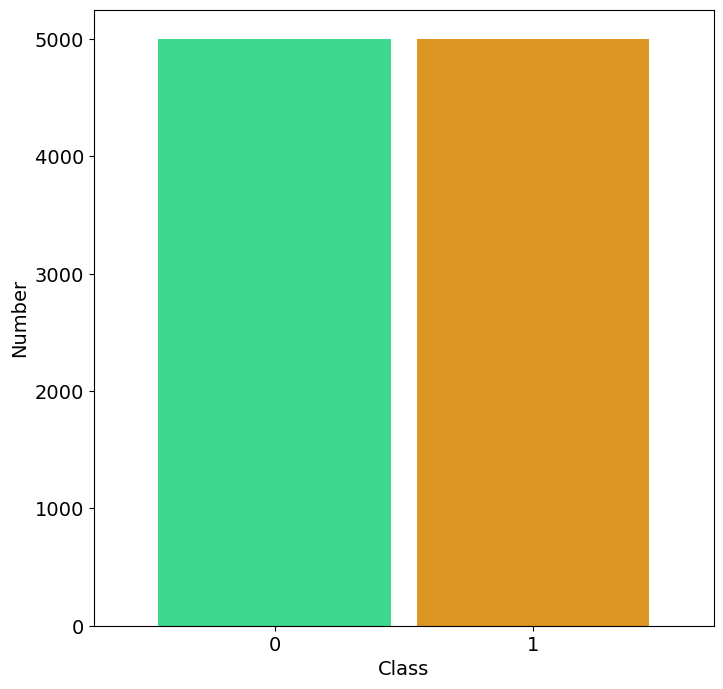

In [25]:
plt.figure(figsize=[8,8])
Phis_full.CLASS_LABEL.value_counts().plot(kind='bar', width=0.9, color=['#3DD88E','#DC9423'])
plt.xlabel('Class',fontsize=14)
plt.ylabel('Number',fontsize=14)
plt.xticks(rotation='horizontal', fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [26]:
X = Phis_full[bestfeatures_list]
y = Phis_full['CLASS_LABEL']

In [27]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
matrix_labels = ['phishing','not phishing']

In [29]:
algorithms = ['Naive Bayes','Logistic Regression','Decision tree','Random Forest','XGBoost','CatBoost']

In [30]:
metrics_list = []

In [31]:
classifiers = [MultinomialNB(), LogisticRegression(), DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None), 
RandomForestClassifier(n_estimators = 10), xgb.XGBClassifier(random_state=42), CatBoostClassifier(task_type="GPU", devices='0:1')]

In [32]:
k = 0
for i in classifiers:
    i.fit(x_train, y_train)        
    y_pred = i.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    metrics_list.append({'Accuracy': accuracy,
                        'Precision': precision,
                        'Recall': recall,
                        'F1-score': f1,
                        'fpr': fpr,
                        'tpr': tpr})
        
    print("Evaluation metrics of " + algorithms[k]+" algorithm: ")
    print('Accuracy: ', accuracy)  
    print('Precision: ', precision)
    print('Recall: ', recall)
    print('F1-score: ', f1)
    
    k = k + 1

Evaluation metrics of Naive Bayes algorithm: 
Accuracy:  0.8263333333333334
Precision:  0.9098294069861901
Recall:  0.7320261437908496
F1-score:  0.8113002535313292
Evaluation metrics of Logistic Regression algorithm: 
Accuracy:  0.9076666666666666
Precision:  0.8922980588603632
Recall:  0.9313725490196079
F1-score:  0.9114166933162775
Evaluation metrics of Decision tree algorithm: 
Accuracy:  0.961
Precision:  0.9555125725338491
Recall:  0.9686274509803922
F1-score:  0.9620253164556962
Evaluation metrics of Random Forest algorithm: 
Accuracy:  0.9683333333333334
Precision:  0.9692609548724657
Recall:  0.9686274509803922
F1-score:  0.968944099378882
Evaluation metrics of XGBoost algorithm: 
Accuracy:  0.9706666666666667
Precision:  0.9712418300653595
Recall:  0.9712418300653595
F1-score:  0.9712418300653595
Learning rate set to 0.03029
0:	learn: 0.6425091	total: 74ms	remaining: 1m 13s
1:	learn: 0.5976801	total: 144ms	remaining: 1m 11s
2:	learn: 0.5547394	total: 214ms	remaining: 1m 11s


147:	learn: 0.1024882	total: 10.7s	remaining: 1m 1s
148:	learn: 0.1022684	total: 10.8s	remaining: 1m 1s
149:	learn: 0.1021028	total: 10.8s	remaining: 1m 1s
150:	learn: 0.1019067	total: 10.9s	remaining: 1m 1s
151:	learn: 0.1016896	total: 11s	remaining: 1m 1s
152:	learn: 0.1014138	total: 11s	remaining: 1m 1s
153:	learn: 0.1013039	total: 11.1s	remaining: 1m
154:	learn: 0.1011579	total: 11.2s	remaining: 1m
155:	learn: 0.1008759	total: 11.2s	remaining: 1m
156:	learn: 0.1008204	total: 11.3s	remaining: 1m
157:	learn: 0.1006396	total: 11.3s	remaining: 1m
158:	learn: 0.1003845	total: 11.4s	remaining: 1m
159:	learn: 0.1002330	total: 11.5s	remaining: 1m
160:	learn: 0.1000753	total: 11.5s	remaining: 1m
161:	learn: 0.0999788	total: 11.6s	remaining: 60s
162:	learn: 0.0998425	total: 11.7s	remaining: 59.9s
163:	learn: 0.0997424	total: 11.7s	remaining: 59.8s
164:	learn: 0.0995358	total: 11.8s	remaining: 59.8s
165:	learn: 0.0993961	total: 11.9s	remaining: 59.6s
166:	learn: 0.0993308	total: 11.9s	remaini

307:	learn: 0.0846503	total: 20.7s	remaining: 46.6s
308:	learn: 0.0846194	total: 20.8s	remaining: 46.5s
309:	learn: 0.0845419	total: 20.9s	remaining: 46.4s
310:	learn: 0.0844580	total: 20.9s	remaining: 46.3s
311:	learn: 0.0844012	total: 21s	remaining: 46.2s
312:	learn: 0.0843668	total: 21s	remaining: 46.2s
313:	learn: 0.0843385	total: 21.1s	remaining: 46.2s
314:	learn: 0.0843070	total: 21.2s	remaining: 46.1s
315:	learn: 0.0842430	total: 21.2s	remaining: 46s
316:	learn: 0.0840298	total: 21.3s	remaining: 45.9s
317:	learn: 0.0839871	total: 21.4s	remaining: 45.8s
318:	learn: 0.0838005	total: 21.4s	remaining: 45.7s
319:	learn: 0.0836869	total: 21.5s	remaining: 45.6s
320:	learn: 0.0834487	total: 21.5s	remaining: 45.6s
321:	learn: 0.0833770	total: 21.6s	remaining: 45.5s
322:	learn: 0.0833380	total: 21.7s	remaining: 45.4s
323:	learn: 0.0830926	total: 21.7s	remaining: 45.3s
324:	learn: 0.0830652	total: 21.8s	remaining: 45.3s
325:	learn: 0.0830120	total: 21.9s	remaining: 45.2s
326:	learn: 0.0829

466:	learn: 0.0761492	total: 29.7s	remaining: 33.9s
467:	learn: 0.0760305	total: 29.7s	remaining: 33.8s
468:	learn: 0.0759344	total: 29.8s	remaining: 33.7s
469:	learn: 0.0759343	total: 29.9s	remaining: 33.7s
470:	learn: 0.0759341	total: 29.9s	remaining: 33.6s
471:	learn: 0.0759060	total: 30s	remaining: 33.5s
472:	learn: 0.0758437	total: 30s	remaining: 33.5s
473:	learn: 0.0758354	total: 30.1s	remaining: 33.4s
474:	learn: 0.0757456	total: 30.1s	remaining: 33.3s
475:	learn: 0.0757446	total: 30.2s	remaining: 33.2s
476:	learn: 0.0757206	total: 30.2s	remaining: 33.2s
477:	learn: 0.0756441	total: 30.3s	remaining: 33.1s
478:	learn: 0.0756330	total: 30.3s	remaining: 33s
479:	learn: 0.0755941	total: 30.4s	remaining: 32.9s
480:	learn: 0.0755613	total: 30.4s	remaining: 32.9s
481:	learn: 0.0755400	total: 30.5s	remaining: 32.8s
482:	learn: 0.0755135	total: 30.6s	remaining: 32.7s
483:	learn: 0.0754969	total: 30.6s	remaining: 32.6s
484:	learn: 0.0754055	total: 30.7s	remaining: 32.6s
485:	learn: 0.0754

627:	learn: 0.0709522	total: 38.4s	remaining: 22.7s
628:	learn: 0.0709025	total: 38.4s	remaining: 22.7s
629:	learn: 0.0708389	total: 38.5s	remaining: 22.6s
630:	learn: 0.0707671	total: 38.6s	remaining: 22.6s
631:	learn: 0.0707670	total: 38.6s	remaining: 22.5s
632:	learn: 0.0707385	total: 38.7s	remaining: 22.4s
633:	learn: 0.0707384	total: 38.8s	remaining: 22.4s
634:	learn: 0.0707174	total: 38.8s	remaining: 22.3s
635:	learn: 0.0707174	total: 38.9s	remaining: 22.3s
636:	learn: 0.0707172	total: 38.9s	remaining: 22.2s
637:	learn: 0.0706317	total: 39s	remaining: 22.1s
638:	learn: 0.0706087	total: 39s	remaining: 22.1s
639:	learn: 0.0705829	total: 39.1s	remaining: 22s
640:	learn: 0.0705276	total: 39.1s	remaining: 21.9s
641:	learn: 0.0704653	total: 39.2s	remaining: 21.9s
642:	learn: 0.0704520	total: 39.2s	remaining: 21.8s
643:	learn: 0.0704278	total: 39.3s	remaining: 21.7s
644:	learn: 0.0704110	total: 39.3s	remaining: 21.7s
645:	learn: 0.0703932	total: 39.4s	remaining: 21.6s
646:	learn: 0.0703

788:	learn: 0.0673393	total: 47s	remaining: 12.6s
789:	learn: 0.0672677	total: 47.1s	remaining: 12.5s
790:	learn: 0.0672677	total: 47.1s	remaining: 12.4s
791:	learn: 0.0671946	total: 47.2s	remaining: 12.4s
792:	learn: 0.0671946	total: 47.2s	remaining: 12.3s
793:	learn: 0.0671916	total: 47.3s	remaining: 12.3s
794:	learn: 0.0671916	total: 47.3s	remaining: 12.2s
795:	learn: 0.0671572	total: 47.4s	remaining: 12.1s
796:	learn: 0.0671543	total: 47.4s	remaining: 12.1s
797:	learn: 0.0670883	total: 47.5s	remaining: 12s
798:	learn: 0.0670814	total: 47.5s	remaining: 12s
799:	learn: 0.0670605	total: 47.6s	remaining: 11.9s
800:	learn: 0.0670605	total: 47.6s	remaining: 11.8s
801:	learn: 0.0670605	total: 47.7s	remaining: 11.8s
802:	learn: 0.0670566	total: 47.8s	remaining: 11.7s
803:	learn: 0.0670566	total: 47.8s	remaining: 11.7s
804:	learn: 0.0670473	total: 47.9s	remaining: 11.6s
805:	learn: 0.0670473	total: 47.9s	remaining: 11.5s
806:	learn: 0.0670473	total: 48s	remaining: 11.5s
807:	learn: 0.066994

949:	learn: 0.0635839	total: 56s	remaining: 2.95s
950:	learn: 0.0635690	total: 56.1s	remaining: 2.89s
951:	learn: 0.0635648	total: 56.1s	remaining: 2.83s
952:	learn: 0.0635648	total: 56.2s	remaining: 2.77s
953:	learn: 0.0635198	total: 56.3s	remaining: 2.71s
954:	learn: 0.0635198	total: 56.3s	remaining: 2.65s
955:	learn: 0.0635130	total: 56.3s	remaining: 2.59s
956:	learn: 0.0635130	total: 56.4s	remaining: 2.53s
957:	learn: 0.0635130	total: 56.5s	remaining: 2.48s
958:	learn: 0.0634909	total: 56.6s	remaining: 2.42s
959:	learn: 0.0634861	total: 56.6s	remaining: 2.36s
960:	learn: 0.0634695	total: 56.7s	remaining: 2.3s
961:	learn: 0.0634493	total: 56.7s	remaining: 2.24s
962:	learn: 0.0634327	total: 56.8s	remaining: 2.18s
963:	learn: 0.0634129	total: 56.9s	remaining: 2.12s
964:	learn: 0.0634107	total: 56.9s	remaining: 2.06s
965:	learn: 0.0634107	total: 57s	remaining: 2s
966:	learn: 0.0633579	total: 57s	remaining: 1.95s
967:	learn: 0.0633579	total: 57.1s	remaining: 1.89s
968:	learn: 0.0633561	

In [37]:
model_dnn = Sequential()
model_dnn.add(Dense(256, input_dim=20))
model_dnn.add(Activation('relu'))
model_dnn.add(Dropout(0.4))
model_dnn.add(Dense(128))
model_dnn.add(Activation('relu'))
model_dnn.add(Dropout(0.2))
model_dnn.add(Dense(1))
model_dnn.add(Activation('sigmoid'))
model_dnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', Precision(), 
                                                                         Recall(),
                                                                         tfa.metrics.FBetaScore(num_classes=2,average="micro",threshold=0.9)])
model_dnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               5376      
                                                                 
 activation_6 (Activation)   (None, 256)               0         
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 activation_7 (Activation)   (None, 128)               0         
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 1)                

In [38]:
history_dnn = model_dnn.fit(x_train, y_train, batch_size = 128, epochs = 100, verbose=1, validation_split=0.1)

Epoch 1/100
50/50 [==============================] - 1s 14ms/step - loss: 0.4489 - accuracy: 0.7987 - precision_2: 0.8034 - recall_2: 0.7886 - fbeta_score: 0.3809 - val_loss: 0.2684 - val_accuracy: 0.8714 - val_precision_2: 0.8446 - val_recall_2: 0.8952 - val_fbeta_score: 0.7449
Epoch 2/100
50/50 [==============================] - 0s 9ms/step - loss: 0.2848 - accuracy: 0.8656 - precision_2: 0.8623 - recall_2: 0.8686 - fbeta_score: 0.7264 - val_loss: 0.2343 - val_accuracy: 0.8943 - val_precision_2: 0.8939 - val_recall_2: 0.8832 - val_fbeta_score: 0.7812
Epoch 3/100
50/50 [==============================] - 0s 9ms/step - loss: 0.2620 - accuracy: 0.8805 - precision_2: 0.8722 - recall_2: 0.8903 - fbeta_score: 0.7653 - val_loss: 0.2204 - val_accuracy: 0.9029 - val_precision_2: 0.8634 - val_recall_2: 0.9461 - val_fbeta_score: 0.7943
Epoch 4/100
50/50 [==============================] - 0s 9ms/step - loss: 0.2420 - accuracy: 0.8962 - precision_2: 0.8852 - recall_2: 0.9094 - fbeta_score: 0.7783 

50/50 [==============================] - 0s 8ms/step - loss: 0.0981 - accuracy: 0.9657 - precision_2: 0.9617 - recall_2: 0.9697 - fbeta_score: 0.9144 - val_loss: 0.1116 - val_accuracy: 0.9557 - val_precision_2: 0.9443 - val_recall_2: 0.9641 - val_fbeta_score: 0.9346
Epoch 60/100
50/50 [==============================] - 0s 8ms/step - loss: 0.1009 - accuracy: 0.9644 - precision_2: 0.9613 - recall_2: 0.9675 - fbeta_score: 0.9157 - val_loss: 0.1105 - val_accuracy: 0.9614 - val_precision_2: 0.9555 - val_recall_2: 0.9641 - val_fbeta_score: 0.8841
Epoch 61/100
50/50 [==============================] - 0s 9ms/step - loss: 0.1001 - accuracy: 0.9630 - precision_2: 0.9586 - recall_2: 0.9675 - fbeta_score: 0.9129 - val_loss: 0.1175 - val_accuracy: 0.9557 - val_precision_2: 0.9443 - val_recall_2: 0.9641 - val_fbeta_score: 0.9375
Epoch 62/100
50/50 [==============================] - 0s 9ms/step - loss: 0.1009 - accuracy: 0.9632 - precision_2: 0.9610 - recall_2: 0.9652 - fbeta_score: 0.9192 - val_loss

In [39]:
loss_dnn, accuracy_dnn, precision_dnn, recall_dnn, f1_score_dnn = model_dnn.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: {:.4f}".format(accuracy_dnn))
loss_dnn, accuracy_dnn, precision_dnn, recall_dnn, f1_score_dnn = model_dnn.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: {:.4f}".format(accuracy_dnn))

Training Accuracy: 0.9711
Testing Accuracy: 0.9617


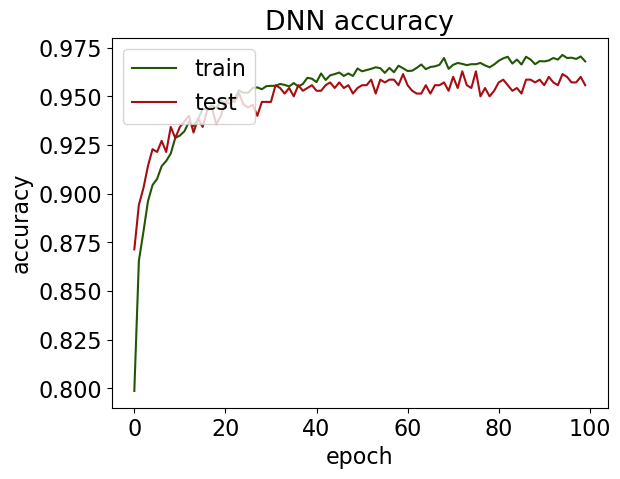

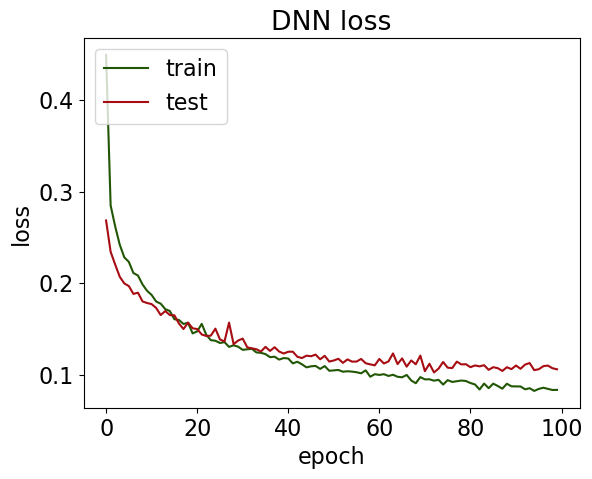

In [40]:
#plot for accuracy
plt.rcParams['font.size'] = 16
plt.plot(history_dnn.history['accuracy'], color='#215704')
plt.plot(history_dnn.history['val_accuracy'], color='#A70C13')
plt.title('DNN accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#plot for loss
plt.plot(history_dnn.history['loss'], color='#215704')
plt.plot(history_dnn.history['val_loss'], color='#A70C13')
plt.title('DNN loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [41]:
y_pred = model_dnn.predict(x_test)

94/94 [==============================] - 0s 1ms/step


In [42]:
y_pred = list(map(lambda x: 0 if x<0.5 else 1, y_pred))

In [43]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)

In [44]:
print("Scores:")
print("Accuracy - " + str(accuracy))
print("Precision - " + str(precision))
print("Recall - " + str(recall))
print("F1-score - " + str(f1_score))

Scores:
Accuracy - 0.9616666666666667
Precision - 0.9573367808661927
Recall - 0.9679738562091503
F1-score - 0.9626259343516412


In [45]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

In [46]:
metrics_list.append({'Accuracy': accuracy,
                    'Precision': precision,
                    'Recall': recall,
                    'F1-score': f1,
                    'fpr': fpr,
                    'tpr': tpr})

In [47]:
metrics_list

[{'Accuracy': 0.8263333333333334,
  'Precision': 0.9098294069861901,
  'Recall': 0.7320261437908496,
  'F1-score': 0.8113002535313292,
  'fpr': array([0.       , 0.0755102, 1.       ]),
  'tpr': array([0.        , 0.73202614, 1.        ])},
 {'Accuracy': 0.9076666666666666,
  'Precision': 0.8922980588603632,
  'Recall': 0.9313725490196079,
  'F1-score': 0.9114166933162775,
  'fpr': array([0.       , 0.1170068, 1.       ]),
  'tpr': array([0.        , 0.93137255, 1.        ])},
 {'Accuracy': 0.961,
  'Precision': 0.9555125725338491,
  'Recall': 0.9686274509803922,
  'F1-score': 0.9620253164556962,
  'fpr': array([0.        , 0.04693878, 1.        ]),
  'tpr': array([0.        , 0.96862745, 1.        ])},
 {'Accuracy': 0.9683333333333334,
  'Precision': 0.9692609548724657,
  'Recall': 0.9686274509803922,
  'F1-score': 0.968944099378882,
  'fpr': array([0.        , 0.03197279, 1.        ]),
  'tpr': array([0.        , 0.96862745, 1.        ])},
 {'Accuracy': 0.9706666666666667,
  'Precisi

In [48]:
ML_DNN_models = ['Naive Bayes','Logistic Regression','Decision tree','Random Forest','XGBoost','CatBoost','DNN']

In [49]:
data_bar = pd.DataFrame(metrics_list, index=ML_DNN_models)

In [50]:
data_fpr_tpr = pd.DataFrame(metrics_list, index=ML_DNN_models)
data_fpr_tpr.drop(['Accuracy','Precision','Recall','F1-score'], axis=1, inplace=True)

In [51]:
data_bar.drop(['fpr','tpr'], axis=1, inplace=True)

In [52]:
tpr_list = data_fpr_tpr['tpr'].to_list()
fpr_list = data_fpr_tpr['fpr'].to_list()

In [53]:
auc_roc_list = []

In [54]:
for i in range(len(tpr_list)):
    auc_roc_list.append(metrics.auc(fpr_list[i], tpr_list[i]))

In [55]:
clrs2 = ['green',  'yellow', 'orange', 'red', 'blue', 'cyan', 'brown']

In [56]:
bar_plot_data = pd.DataFrame({
    "Accuracy": data_bar["Accuracy"].values,
    "Precision": data_bar["Precision"].values,
    "Recall": data_bar["Recall"].values,
    "F1-score": data_bar["F1-score"].values
    },
    index=["Naive Bayes","Logistic Regression","Decision tree","Random Forest","XGBoost","CatBoost","DNN"]
)

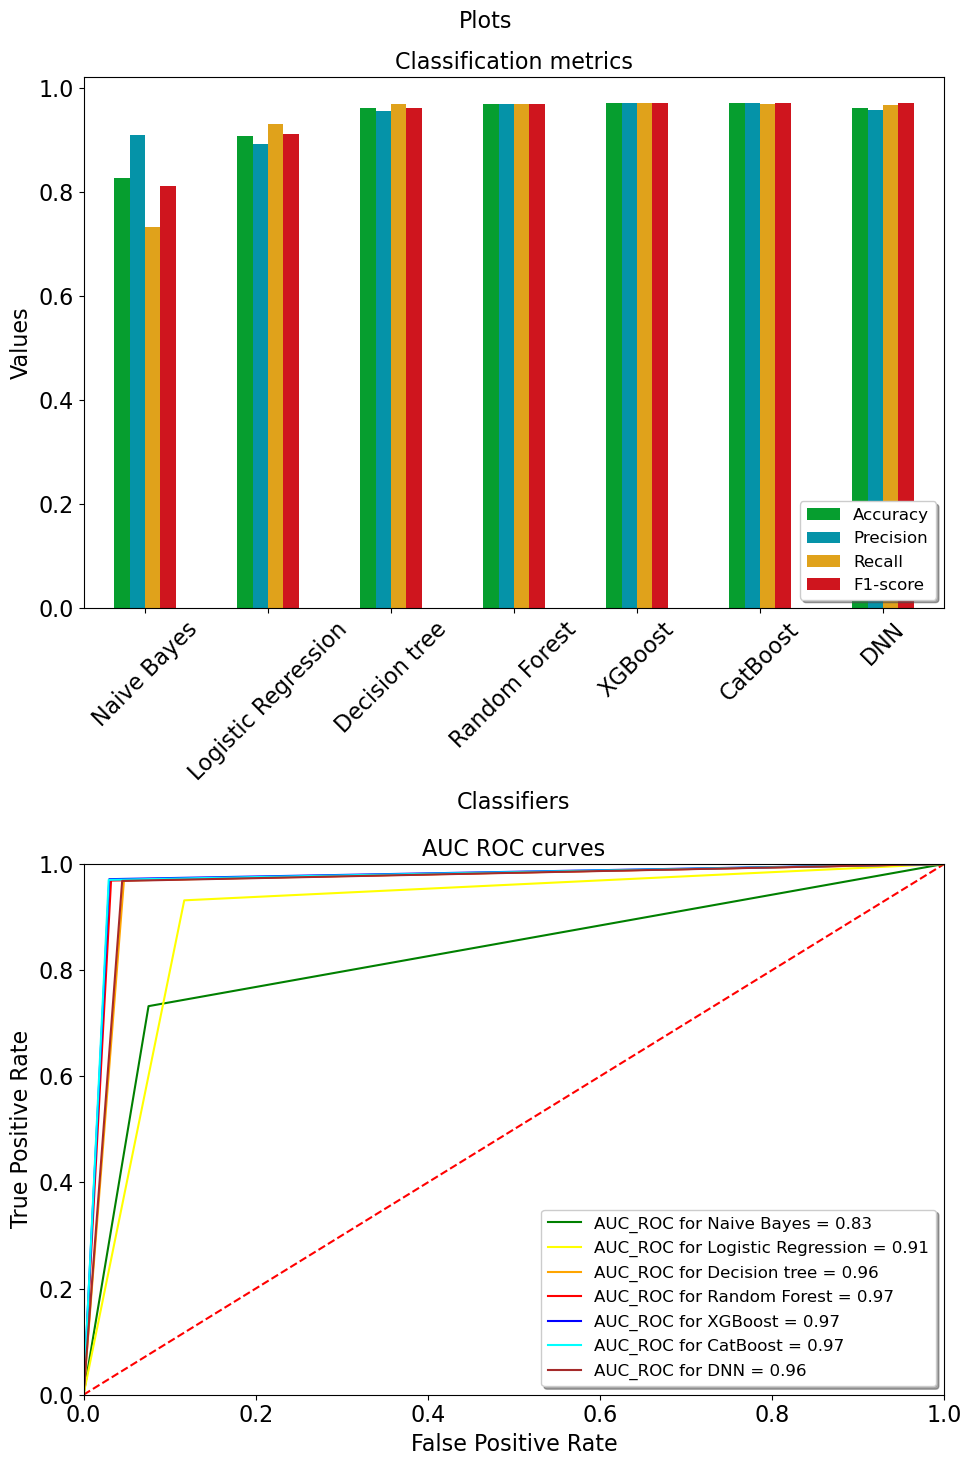

In [57]:
fig, axes = plt.subplots(2, 1, figsize=(10,15))
fig.suptitle('Plots', fontsize = 16)
axes[0].set_title('Classification metrics', fontsize = 16)
clrs = ['#069e2f',  '#0593a8', '#e0a21b', '#cf151e']
data_bar.plot(kind="bar", ax=axes[0], color=clrs, rot=45)
axes[0].set_xlabel('Classifiers', fontsize = 16)
axes[0].set_ylabel('Values', fontsize = 16)
axes[0].legend(loc = 'lower right', fancybox=True, fontsize=12, shadow = True)

axes[1].set_title('AUC ROC curves', fontsize = 16)
axes[1].plot([0, 1], [0, 1],'r--')
axes[1].set_xlim([0, 1])
axes[1].set_ylim([0, 1])
axes[1].set_ylabel('True Positive Rate', fontsize = 16)
axes[1].set_xlabel('False Positive Rate', fontsize = 16)
for i in range(len(auc_roc_list)):
    axes[1].plot(fpr_list[i], tpr_list[i], clrs2[i], label = 'AUC_ROC for ' + ML_DNN_models[i] + ' = %0.2f' % auc_roc_list[i])

axes[1].legend(loc = 'lower right', fancybox=True, fontsize=12, shadow = True)
fig.tight_layout()
plt.show()